In [2]:
import pandas as pd
# reading pickle file for document-term-matrix
dtm = pd.read_pickle('pickles/dtm.pkl')
dtm = dtm.transpose()
dtm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [3]:
# top 30 words used by each comedian
top_dict = {}
for c in dtm.columns:
    top = dtm[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
#top_dict

In [4]:
# print top 15 words
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print("----")

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, oh, wanna, gotta
----
anthony
im, like, know, dont, got, joke, said, thats, anthony, just, day, say, guys, people
----
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
----
bo
know, like, love, think, im, just, bo, stuff, repeat, dont, yeah, want, right, cos
----
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
----
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
----
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, think
----
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
----
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, time, got
----
louis
like, just, know, dont, thats, im, youre, life, people, thing, hes, gonna, cause, theres
----
mike
like, im, know, said, just, dont, 

In [5]:
# most common top words 
from collections import Counter

#  pull out the top 30 words for each comedian
words = []
for comedian in dtm.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
#words

In [6]:
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('time', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('really', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('little', 4),
 ('guys', 3),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('dude', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('school', 1),
 ('jokes', 1),
 ('baby', 1),
 ('o

In [7]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'time',
 'think',
 'yeah',
 'said']

In [8]:
# update document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('pickles/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("pickles/cv_stop.pkl", "wb"))
data_stop.to_pickle("pickles/dtm_stop.pkl")

In [9]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

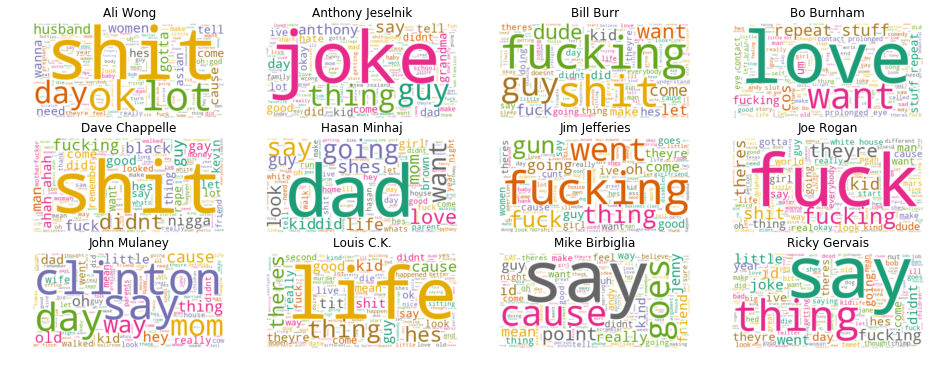

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6] #An instance of RcParams for handling default matplotlib values.

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(dtm.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1) # no of subplots with each row and col
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off") # remove axis of the sub plots
    plt.title(full_names[index])
    
plt.show()

In [11]:
# number of unique words that each comedian uses
unique_list = []
for comedian in dtm.columns:
    uniques = dtm[comedian].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis C.K.,1098
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1391
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1559


In [13]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in dtm.columns:
    totals = sum(dtm[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort


,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4763,77,61.857143
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1391,4001,62,64.532258
5,Hasan Minhaj,1559,4777,73,65.438356


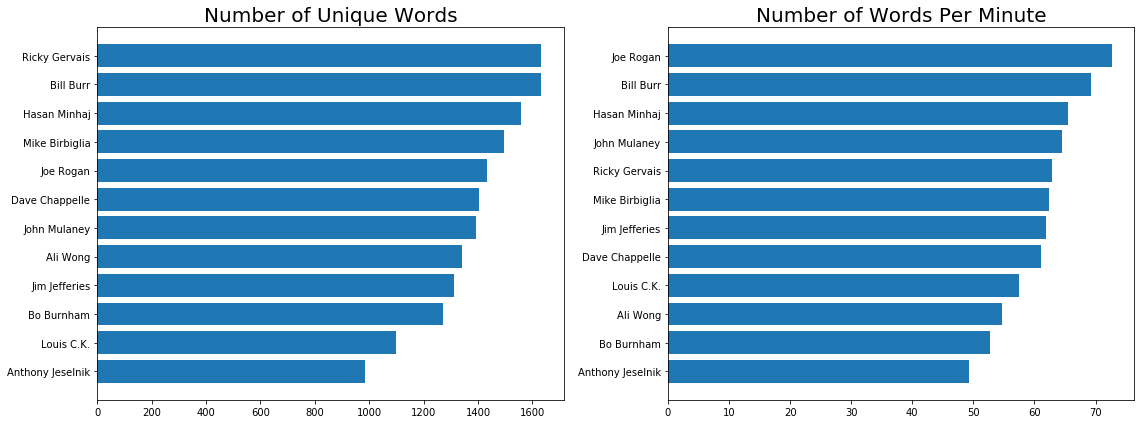

In [14]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [17]:
'''
Counter(words).most_common()
# Let's isolate just these bad words
data_bad_words = dtm.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']

plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()
'''

"\nCounter(words).most_common()\n# Let's isolate just these bad words\ndata_bad_words = dtm.transpose()[['fucking', 'fuck', 'shit']]\ndata_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)\ndata_profanity.columns = ['f_word', 's_word']\n\nplt.rcParams['figure.figsize'] = [10, 8]\n\nfor i, comedian in enumerate(data_profanity.index):\n    x = data_profanity.f_word.loc[comedian]\n    y = data_profanity.s_word.loc[comedian]\n    plt.scatter(x, y, color='blue')\n    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)\n    plt.xlim(-5, 155) \n    \nplt.title('Number of Bad Words Used in Routine', fontsize=20)\nplt.xlabel('Number of F Bombs', fontsize=15)\nplt.ylabel('Number of S Words', fontsize=15)\n\nplt.show()\n"